#Data Load

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import kagglehub
import os
from PIL import Image
import imageio
import cv2
from sklearn.model_selection import train_test_split
# Download latest version
path_of = kagglehub.dataset_download("grassknoted/asl-alphabet")

print("Path to dataset files:", path_of)

Path to dataset files: /kaggle/input/asl-alphabet


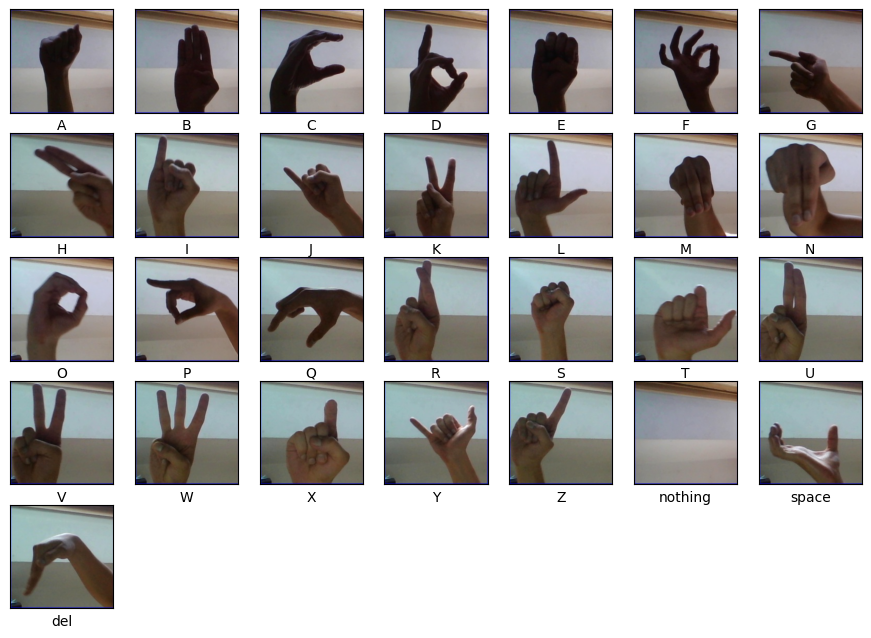

In [ ]:
train_dir = path_of+'/asl_alphabet_train/asl_alphabet_train'
test_dir = 'asl/asl_alphabet_test/asl_alphabet_test'
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
           'W', 'X', 'Y', 'Z', 'nothing', 'space', 'del']
plt.figure(figsize=(11, 11))
for i in range (0,29):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = train_dir + "/{0}/{0}1.jpg".format(classes[i])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(classes[i])

In [ ]:
def load_data(train_dir):
    images = []
    labels = []
    size = 32,32
    index = -1
    for folder in os.listdir(train_dir):
        index +=1
        for image in os.listdir(train_dir + "/" + folder):
            temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            labels.append(index)

    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = tf.keras.utils.to_categorical(labels)
    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1, random_state = 0)

    print('Loaded', len(x_train),'images for training,','Train data shape =', x_train.shape)
    print('Loaded', len(x_test),'images for testing','Test data shape =', x_test.shape)
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = load_data(train_dir)

Loaded 78300 images for training, Train data shape = (78300, 32, 32, 3)
Loaded 8700 images for testing Test data shape = (8700, 32, 32, 3)


In [ ]:
# delibately decrease the train size to make the task more difficult for the project
x_train_ = x_train[5000:10000]
y_train_ = y_train[5000:10000]

In [ ]:
x_train_n, x_val, y_train_n, y_val = train_test_split(x_train_, y_train_, test_size = 0.1, random_state = 100)

#Model_1

In [ ]:
model_1=tf.keras.Sequential()
model_1.add(tf.keras.layers.Input(shape=(32,32,3)))
model_1.add(tf.keras.layers.BatchNormalization())
model_1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(2,2),padding='same',activation='relu'))
model_1.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
for rate in (2,6,9)*2:
  model_1.add(tf.keras.layers.Conv2D(filters=32*rate,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_normal',dilation_rate=rate))
  model_1.add(tf.keras.layers.BatchNormalization())
model_1.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model_1.add(tf.keras.layers.GlobalAveragePooling2D())
model_1.add(tf.keras.layers.Dense(29,activation='softmax'))
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_28          │ (None, 32, 32, 3)      │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 32, 32, 32)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 16, 16, 192)    │       110,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 16, 16, 192)    │           768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 16, 16, 288)    │       497,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 16, 16, 288)    │         1,152 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 16, 16, 64)     │       165,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 16, 16, 192)    │       110,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 16, 16, 192)    │           768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 16, 16, 288)    │       497,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 16, 16, 288)    │         1,152 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 288)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 288)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 29)             │         8,381 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,415,081 (5.40 MB)

 Trainable params: 1,412,899 (5.39 MB)

 Non-trainable params: 2,182 (8.52 KB)

In [ ]:
def lr_schedule_exp(epoch,lr):
  if epoch<30:
    return float(tf.exp(-epoch/10.)*0.01)
  else:
    return 0.0001/8


schedule=tf.keras.callbacks.LearningRateScheduler(lr_schedule_exp)
check_point=tf.keras.callbacks.ModelCheckpoint('model_1.keras',monitor='val_accuracy',verbose=1,save_best_only=True)

In [ ]:
model_1.compile(optimizer=tf.keras.optimizers.SGD(momentum=0.9,nesterov=True),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model_1.fit(x_train_n,y_train_n,epochs=40,validation_data=(x_val,y_val),callbacks=[schedule,check_point],batch_size=32)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.2149 - loss: 2.8168
Epoch 1: val_accuracy improved from -inf to 0.07000, saving model to model_1.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 24s 100ms/step - accuracy: 0.2158 - loss: 2.8124 - val_accuracy: 0.0700 - val_loss: 4.5257 - learning_rate: 0.0100
Epoch 2/50
140/141 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6721 - loss: 1.0477
Epoch 2: val_accuracy improved from 0.07000 to 0.26800, saving model to model_1.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.6724 - loss: 1.0463 - val_accuracy: 0.2680 - val_loss: 3.1830 - learning_rate: 0.0090
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8211 - loss: 0.5537
Epoch 3: val_accuracy improved from 0.26800 to 0.77400, saving model to model_1.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.8211 - loss: 0.5536 - val_accuracy: 0.7740 - val_loss: 0.7118 - learning_rate: 0.0082
Epoch 4/50
140/141 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - 

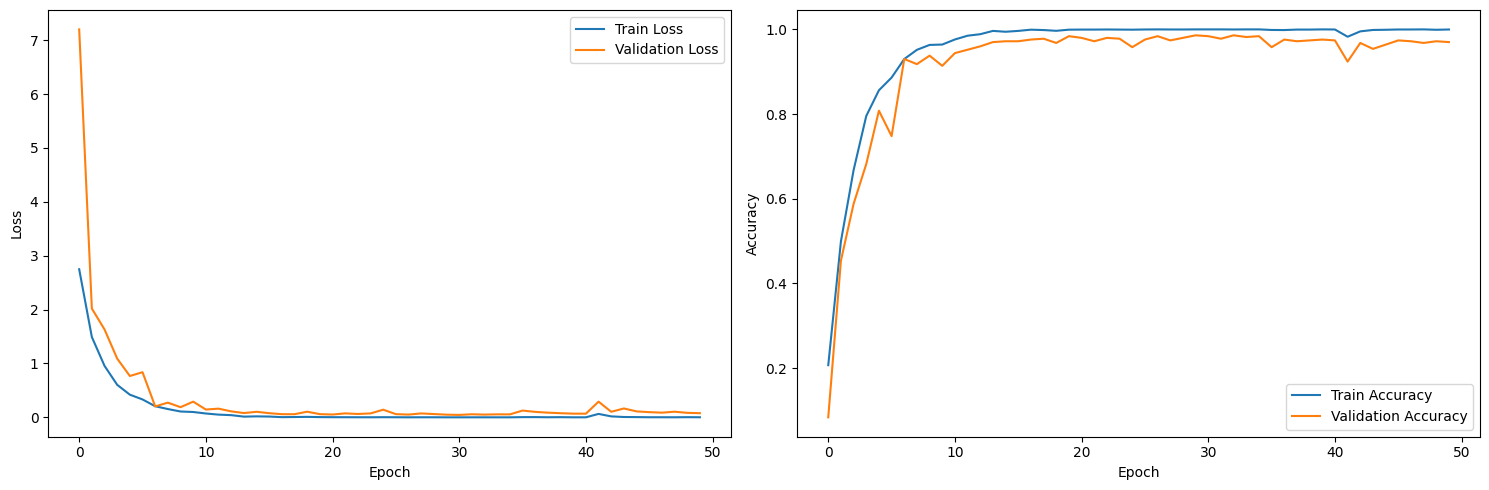

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(15,5))

axes[0].plot(history.history['loss'],label='Train Loss')
axes[0].plot(history.history['val_loss'],label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

axes[1].plot(history.history['accuracy'],label='Train Accuracy')
axes[1].plot(history.history['val_accuracy'],label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.tight_layout()

In [ ]:
model_1.evaluate(x_test,y_test)

272/272 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9768 - loss: 0.0890


[0.08947603404521942, 0.9764367938041687]

#Model_2_99.28 ac

In [ ]:

from functools import partial
Conv2d=partial(tf.keras.layers.Conv2D,kernel_size=3,padding='same',strides=1 )

@tf.keras.utils.register_keras_serializable()
class Inception_mode(tf.keras.layers.Layer):
  def __init__ (self,filters,strides=1,activation='relu',**kwargs):
    super().__init__(**kwargs)
    self.filters=filters
    self.strides=strides
    self.activation=activation
    self.concat = tf.keras.layers.Concatenate(axis=-1)

    self.inception_layers_1=[tf.keras.layers.MaxPooling2D(pool_size=2,strides=strides,padding='same'),
                             Conv2d(filters=filters,activation=activation),
                             tf.keras.layers.BatchNormalization(),
                             Conv2d(filters=filters)]

    self.inception_layers_2=[tf.keras.layers.AveragePooling2D(pool_size=2,strides=strides,padding='same'),
                             Conv2d(filters=filters),
                             tf.keras.layers.BatchNormalization(),
                             Conv2d(filters=filters)]

    self.inception_layers_3=[Conv2d(filters=filters,strides=strides,activation=activation,kernel_size=1),
                             tf.keras.layers.BatchNormalization(),
                             Conv2d(filters=filters,kernel_size=1)]



  def build(self, input_shape):
      input_shape = list(input_shape)
      input_shape[0] = 1
      input_shape = tuple(input_shape)

      dummy = tf.keras.backend.zeros(input_shape)
      _ = self.call(dummy)
      super().build(input_shape)


  def call(self, inputs):
      def apply_layers(x, layer_list):
          for layer in layer_list:
              x = layer(x)
          return x

      x1 = apply_layers(inputs, self.inception_layers_1)
      x2 = apply_layers(inputs, self.inception_layers_2)
      x3 = apply_layers(inputs, self.inception_layers_3)

      return self.concat([x1, x2, x3])

  def get_config(self):
    config = super().get_config()
    config.update({
        "filters": self.filters,
        "strides": self.strides,
        "activation": self.activation
    })
    return config



In [ ]:
model_2=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32,32,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32,kernel_size=2,padding='same',activation='relu'),
    Inception_mode(filters=32),
    tf.keras.layers.Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'),
    Inception_mode(filters=64),
    tf.keras.layers.Conv2D(filters=128,kernel_size=2,padding='same',activation='relu'),
    Inception_mode(filters=128),
    tf.keras.layers.Conv2D(filters=256,kernel_size=2,padding='same',activation='relu'),
    Inception_mode(filters=256),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(29,activation='softmax')

])


model_2.summary()
model_2.compile(optimizer=tf.keras.optimizers.Nadam(),loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 32, 32, 3)      │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_mode (Inception_mode) │ (None, 32, 32, 96)     │        55,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 64)     │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_mode_1                │ (None, 32, 32, 192)    │       221,952 │
│ (Inception_mode)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 32, 32, 128)    │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_mode_2                │ (None, 32, 32, 384)    │       886,272 │
│ (Inception_mode)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 32, 32, 256)    │       393,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_mode_3                │ (None, 32, 32, 768)    │     3,542,016 │
│ (Inception_mode)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 768)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 29)             │        22,301 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,245,193 (20.01 MB)

 Trainable params: 5,242,307 (20.00 MB)

 Non-trainable params: 2,886 (11.27 KB)

In [ ]:
def lr_schedule_exp(epoch,lr):
  if epoch<50:
    return float(tf.exp(-epoch/10.)*0.01)
  else:
    return 0.0001/2


In [ ]:
schedule_2=tf.keras.callbacks.LearningRateScheduler(lr_schedule_exp)
check_point_2=tf.keras.callbacks.ModelCheckpoint('model_2.keras',monitor='val_accuracy',verbose=1,save_best_only=True)

In [ ]:
history_2=model_2.fit(x_train_n,y_train_n,epochs=60,validation_data=(x_val,y_val),callbacks=[schedule_2,check_point_2])

Epoch 1/60
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.0675 - loss: 14.6400
Epoch 1: val_accuracy improved from -inf to 0.10200, saving model to model_2.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 42s 299ms/step - accuracy: 0.0679 - loss: 14.5846 - val_accuracy: 0.1020 - val_loss: 5.6623 - learning_rate: 0.0100
Epoch 2/60
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.2781 - loss: 2.4216
Epoch 2: val_accuracy improved from 0.10200 to 0.15600, saving model to model_2.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 62s 155ms/step - accuracy: 0.2784 - loss: 2.4205 - val_accuracy: 0.1560 - val_loss: 5.9394 - learning_rate: 0.0090
Epoch 3/60
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.4267 - loss: 1.8589
Epoch 3: val_accuracy improved from 0.15600 to 0.16800, saving model to model_2.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 42s 161ms/step - accuracy: 0.4269 - loss: 1.8579 - val_accuracy: 0.1680 - val_loss: 5.3016 - learning_rate: 0.0082
Epoch 4/60
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 147m

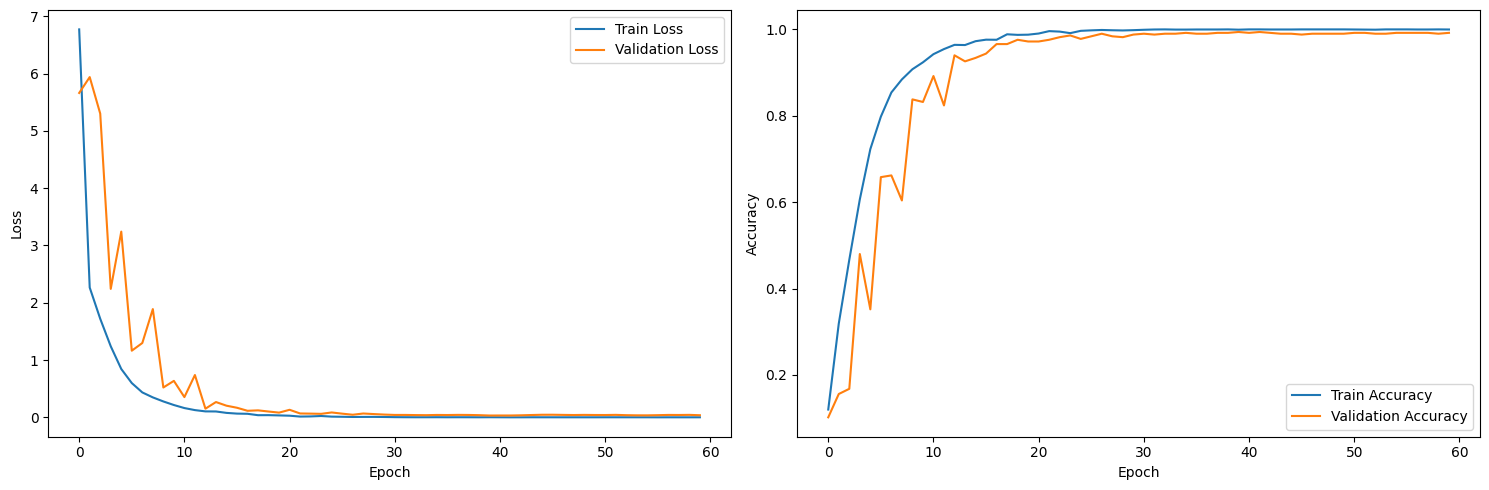

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(15,5))

axes[0].plot(history_2.history['loss'],label='Train Loss')
axes[0].plot(history_2.history['val_loss'],label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

axes[1].plot(history_2.history['accuracy'],label='Train Accuracy')
axes[1].plot(history_2.history['val_accuracy'],label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.tight_layout()

In [ ]:
model_2.evaluate(x_test,y_test)

272/272 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9928 - loss: 0.0265


[0.025704780593514442, 0.9921839237213135]

In [ ]:
model_2.save('ASL_Model_9928.keras')

#Model_3_99.73 ac

In [ ]:
inputs=tf.keras.layers.Input(shape=(32,32,3))
layer_1=tf.keras.layers.BatchNormalization()(inputs)
layer_2=tf.keras.layers.Conv2D(filters=32,kernel_size=2,padding='same',activation='relu')(layer_1)
layer_3=Inception_mode(filters=32)(layer_2)
layer_4=tf.keras.layers.Conv2D(filters=64,kernel_size=2,padding='same',activation='relu')(layer_3)
layer_5=Inception_mode(filters=64)(layer_4)
concatlayer_1=tf.keras.layers.Concatenate(axis=-1)([layer_2,layer_5])
layer_6=tf.keras.layers.Conv2D(filters=128,kernel_size=2,padding='same',activation='relu')(concatlayer_1)
layer_7=Inception_mode(filters=128)(layer_6)
layer_8=tf.keras.layers.Conv2D(filters=256,kernel_size=2,padding='same',activation='relu')(layer_7)
layer_9=Inception_mode(filters=256)(layer_8)
concatlayer_2=tf.keras.layers.Concatenate(axis=-1)([layer_6,layer_9])
layer_10=tf.keras.layers.GlobalAveragePooling2D()(concatlayer_2)
outputs=tf.keras.layers.Dense(29,activation='softmax')(layer_10)

model_3=tf.keras.Model(inputs=inputs,outputs=outputs)








model_3.summary()
model_3.compile(optimizer=tf.keras.optimizers.Nadam(),loss='categorical_crossentropy',metrics=['accuracy'])

Model: "functional_216"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32, 3) │         12 │ input_layer_11[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_157 (Conv2D) │ (None, 32, 32,    │        416 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ inception_mode_8    │ (None, 32, 32,    │     55,680 │ conv2d_157[0][0]  │
│ (Inception_mode)    │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_164 (Conv2D) │ (None, 32, 32,    │     24,640 │ inception_mode_8… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ inception_mode_9    │ (None, 32, 32,    │    221,952 │ conv2d_164[0][0]  │
│ (Inception_mode)    │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_14      │ (None, 32, 32,    │          0 │ conv2d_157[0][0], │
│ (Concatenate)       │ 224)              │            │ inception_mode_9… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_171 (Conv2D) │ (None, 32, 32,    │    114,816 │ concatenate_14[0… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ inception_mode_10   │ (None, 32, 32,    │    886,272 │ conv2d_171[0][0]  │
│ (Inception_mode)    │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_178 (Conv2D) │ (None, 32, 32,    │    393,472 │ inception_mode_1… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ inception_mode_11   │ (None, 32, 32,    │  3,542,016 │ conv2d_178[0][0]  │
│ (Inception_mode)    │ 768)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_17      │ (None, 32, 32,    │          0 │ conv2d_171[0][0], │
│ (Concatenate)       │ 896)              │            │ inception_mode_1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 896)       │          0 │ concatenate_17[0… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 29)        │     26,013 │ global_average_p… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,265,289 (20.09 MB)

 Trainable params: 5,262,403 (20.07 MB)

 Non-trainable params: 2,886 (11.27 KB)

In [ ]:
def lr_schedule_exp(epoch,lr):
  if epoch<50:
    return float(tf.exp(-epoch/10.)*0.01)
  else:
    return 0.0001/5
schedule_2=tf.keras.callbacks.LearningRateScheduler(lr_schedule_exp)
check_point_2=tf.keras.callbacks.ModelCheckpoint('model_3.keras',monitor='val_accuracy',verbose=1,save_best_only=True)

In [ ]:
history_3_with_bach=model_3.fit(x_train_n,y_train_n,epochs=60,validation_data=(x_val,y_val),callbacks=[schedule_2,check_point_2],batch_size=32)

Epoch 1/60
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - accuracy: 0.0642 - loss: 15.7726
Epoch 1: val_accuracy improved from -inf to 0.03600, saving model to model_3.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 65s 327ms/step - accuracy: 0.0646 - loss: 15.7159 - val_accuracy: 0.0360 - val_loss: 15.6020 - learning_rate: 0.0100
Epoch 2/60
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.2573 - loss: 2.5460
Epoch 2: val_accuracy improved from 0.03600 to 0.03800, saving model to model_3.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 51s 161ms/step - accuracy: 0.2576 - loss: 2.5445 - val_accuracy: 0.0380 - val_loss: 18.1864 - learning_rate: 0.0090
Epoch 3/60
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.4668 - loss: 1.6966
Epoch 3: val_accuracy improved from 0.03800 to 0.16800, saving model to model_3.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 24s 169ms/step - accuracy: 0.4672 - loss: 1.6954 - val_accuracy: 0.1680 - val_loss: 6.9157 - learning_rate: 0.0082
Epoch 4/60
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 15

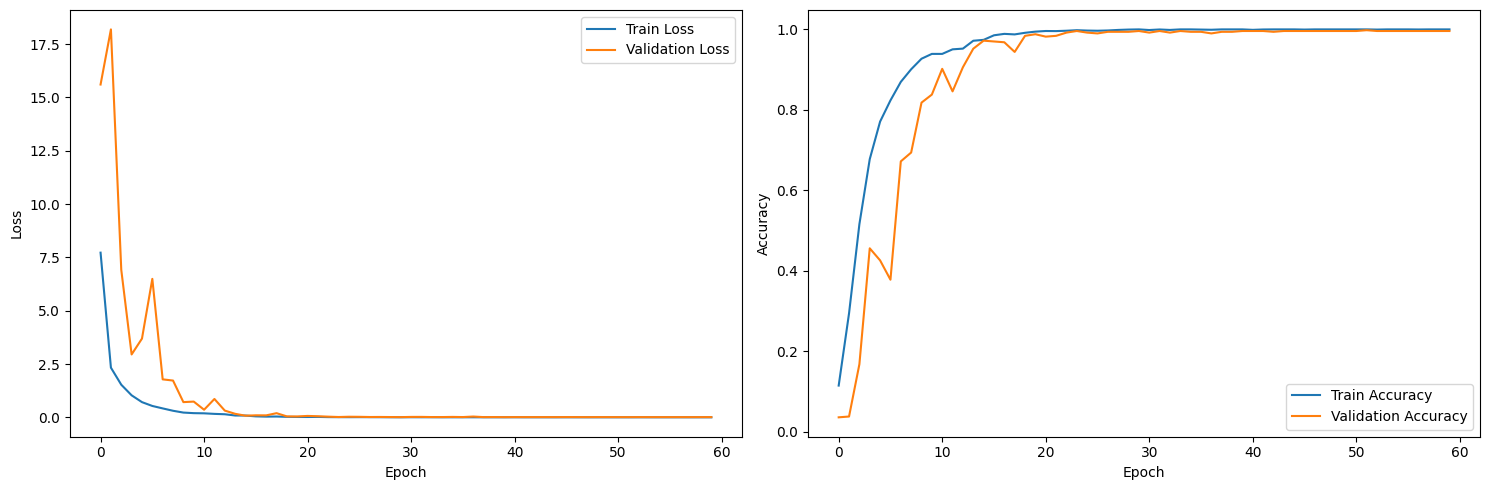

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(15,5))

axes[0].plot(history_3_with_bach.history['loss'],label='Train Loss')
axes[0].plot(history_3_with_bach.history['val_loss'],label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

axes[1].plot(history_3_with_bach.history['accuracy'],label='Train Accuracy')
axes[1].plot(history_3_with_bach.history['val_accuracy'],label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.tight_layout()

In [ ]:
model_3.evaluate(x_test,y_test)

272/272 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step - accuracy: 0.9973 - loss: 0.0123


[0.0114487549290061, 0.9973562955856323]

In [ ]:
model_3.save('ASL_model_9973.keras')

In [ ]:
history_3=model_3.fit(x_train_n,y_train_n,epochs=60,validation_data=(x_val,y_val),callbacks=[schedule_2,check_point_2])

Epoch 1/60
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.0640 - loss: 16.5748
Epoch 1: val_accuracy improved from -inf to 0.04000, saving model to model_3.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 61s 261ms/step - accuracy: 0.0644 - loss: 16.5132 - val_accuracy: 0.0400 - val_loss: 11.0062 - learning_rate: 0.0100
Epoch 2/60
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.2976 - loss: 2.3353
Epoch 2: val_accuracy improved from 0.04000 to 0.14400, saving model to model_3.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 22s 154ms/step - accuracy: 0.2979 - loss: 2.3339 - val_accuracy: 0.1440 - val_loss: 5.5787 - learning_rate: 0.0090
Epoch 3/60
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.5098 - loss: 1.5435
Epoch 3: val_accuracy improved from 0.14400 to 0.17200, saving model to model_3.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 22s 153ms/step - accuracy: 0.5101 - loss: 1.5426 - val_accuracy: 0.1720 - val_loss: 14.0546 - learning_rate: 0.0082
Epoch 4/60
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 14

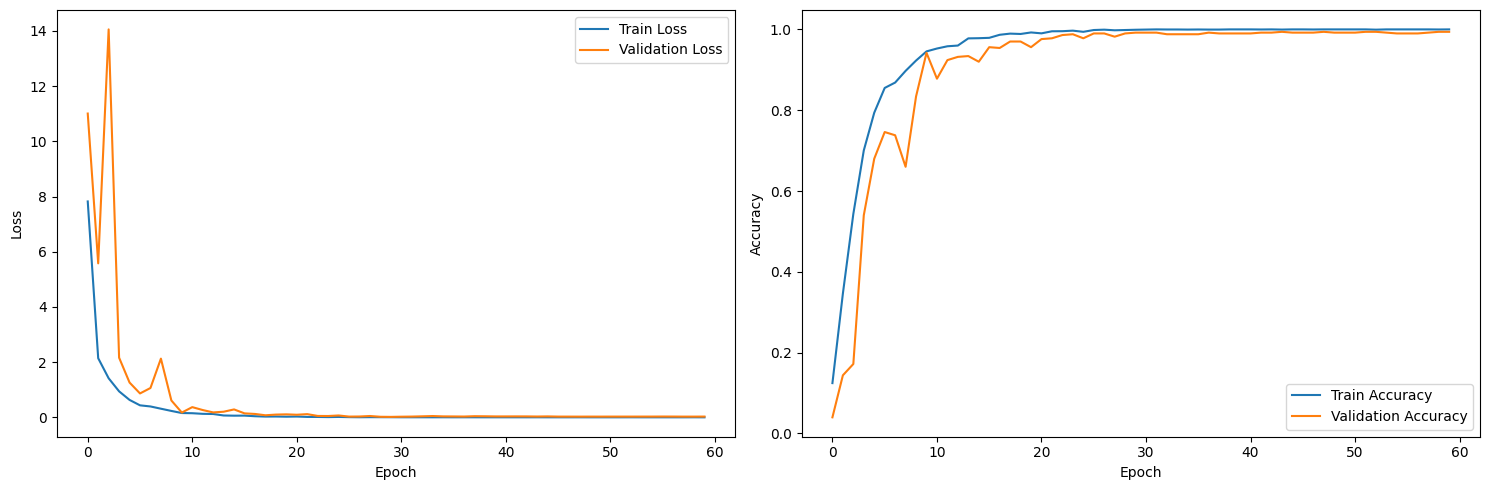

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(15,5))

axes[0].plot(history_3.history['loss'],label='Train Loss')
axes[0].plot(history_3.history['val_loss'],label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

axes[1].plot(history_3.history['accuracy'],label='Train Accuracy')
axes[1].plot(history_3.history['val_accuracy'],label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.tight_layout()

In [ ]:
model_3.evaluate(x_test,y_test)

272/272 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9957 - loss: 0.0136


[0.01613929681479931, 0.9951724410057068]

In [ ]:
model_3.save('ASL_model_9951.keras')

#Model_4_99.66 ac

In [ ]:
Inputs=tf.keras.layers.Input(shape=(32,32,3))
layer_1=tf.keras.layers.BatchNormalization()(Inputs)
layer_2=tf.keras.layers.Conv2D(filters=32,kernel_size=2,padding='same',activation='relu')(layer_1)
layer_3=Inception_mode(filters=32)(layer_2)
layer_4=tf.keras.layers.Conv2D(filters=64,kernel_size=2,padding='same',activation='relu')(layer_3)
layer_5=Inception_mode(filters=64)(layer_4)

concatlayer_1=tf.keras.layers.Concatenate(axis=-1)([layer_3,layer_5])
layer_6=tf.keras.layers.Conv2D(filters=128,kernel_size=2,padding='same',activation='relu')(concatlayer_1)
layer_7=Inception_mode(filters=128)(layer_6)

layer_8=tf.keras.layers.SeparableConv2D(filters=128,kernel_size=2,padding='same',activation='relu')(concatlayer_1)
layer_9=Inception_mode(filters=128)(layer_6)

concatlayer_2=tf.keras.layers.Concatenate(axis=-1)([layer_7,layer_9])

layer_10=tf.keras.layers.SeparableConv2D(filters=256,kernel_size=2,padding='same',activation='relu')(concatlayer_2)
layer_11=Inception_mode(filters=256)(layer_10)

concatlayer_3=tf.keras.layers.Concatenate(axis=-1)([layer_5,layer_11])
norm=tf.keras.layers.BatchNormalization()(concatlayer_3)

layer_12=tf.keras.layers.GlobalAveragePooling2D()(norm)
outputs=tf.keras.layers.Dense(29,activation='softmax')(layer_12)

model_4=tf.keras.Model(inputs=Inputs,outputs=outputs)

model_4.summary()




Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32, 3) │         12 │ input_layer_1[0]… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_33 (Conv2D)  │ (None, 32, 32,    │        416 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ inception_mode_5    │ (None, 32, 32,    │     55,680 │ conv2d_33[0][0]   │
│ (Inception_mode)    │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_40 (Conv2D)  │ (None, 32, 32,    │     24,640 │ inception_mode_5… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ inception_mode_6    │ (None, 32, 32,    │    221,952 │ conv2d_40[0][0]   │
│ (Inception_mode)    │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_10      │ (None, 32, 32,    │          0 │ inception_mode_5… │
│ (Concatenate)       │ 288)              │            │ inception_mode_6… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_47 (Conv2D)  │ (None, 32, 32,    │    147,584 │ concatenate_10[0… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ inception_mode_7    │ (None, 32, 32,    │    886,272 │ conv2d_47[0][0]   │
│ (Inception_mode)    │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ inception_mode_8    │ (None, 32, 32,    │    886,272 │ conv2d_47[0][0]   │
│ (Inception_mode)    │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_13      │ (None, 32, 32,    │          0 │ inception_mode_7… │
│ (Concatenate)       │ 768)              │            │ inception_mode_8… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_3  │ (None, 32, 32,    │    199,936 │ concatenate_13[0… │
│ (SeparableConv2D)   │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ inception_mode_9    │ (None, 32, 32,    │  3,542,016 │ separable_conv2d… │
│ (Inception_mode)    │ 768)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_15      │ (None, 32, 32,    │          0 │ inception_mode_6… │
│ (Concatenate)       │ 960)              │            │ inception_mode_9… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │      3,840 │ concatenate_15[0… │
│ (BatchNormalizatio… │ 960)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 960)       │          0 │ batch_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 29)        │     27,869 │ global_average_p

 Total params: 5,996,489 (22.87 MB)

 Trainable params: 5,990,915 (22.85 MB)

 Non-trainable params: 5,574 (21.77 KB)

In [ ]:
def lr_schedule_exp(epoch,lr):
  if epoch<50:
    return float(tf.exp(-epoch/10.)*0.01)
  else:
    return 0.0001/5

schedule_4=tf.keras.callbacks.LearningRateScheduler(lr_schedule_exp)
check_point_4=tf.keras.callbacks.ModelCheckpoint('model_4.keras',monitor='val_accuracy',verbose=1,save_best_only=True)

In [ ]:
model_4.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])
History_4=model_4.fit(x_train_n,y_train_n,epochs=60,validation_data=(x_val,y_val),callbacks=[schedule_4,check_point_4],batch_size=32)

Epoch 1/60
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.0847 - loss: 3.7028
Epoch 1: val_accuracy improved from -inf to 0.04800, saving model to model_4.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 72s 333ms/step - accuracy: 0.0850 - loss: 3.6992 - val_accuracy: 0.0480 - val_loss: 14.3789 - learning_rate: 0.0100
Epoch 2/60
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.2913 - loss: 2.2720
Epoch 2: val_accuracy improved from 0.04800 to 0.18000, saving model to model_4.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 26s 186ms/step - accuracy: 0.2916 - loss: 2.2709 - val_accuracy: 0.1800 - val_loss: 6.4735 - learning_rate: 0.0090
Epoch 3/60
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.5180 - loss: 1.4702
Epoch 3: val_accuracy improved from 0.18000 to 0.31800, saving model to model_4.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 42s 192ms/step - accuracy: 0.5183 - loss: 1.4691 - val_accuracy: 0.3180 - val_loss: 5.1884 - learning_rate: 0.0082
Epoch 4/60
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms

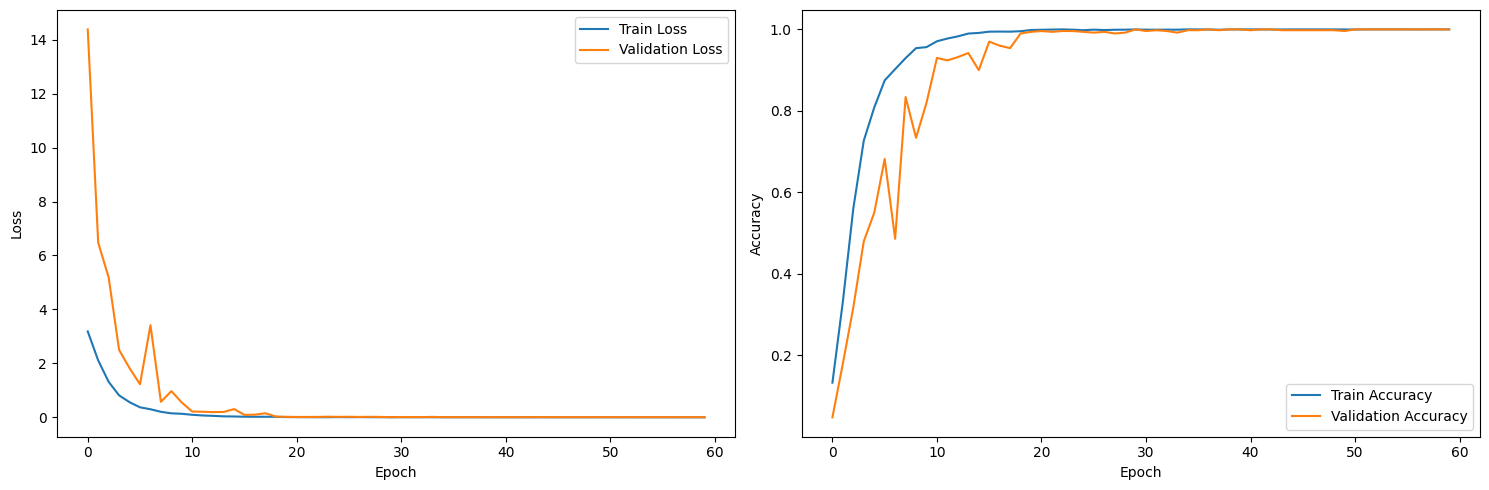

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(15,5))

axes[0].plot(model_4.history.history['loss'],label='Train Loss')
axes[0].plot(model_4.history.history['val_loss'],label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

axes[1].plot(model_4.history.history['accuracy'],label='Train Accuracy')
axes[1].plot(model_4.history.history['val_accuracy'],label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.tight_layout()

In [ ]:
model_4.evaluate(x_test,y_test)

272/272 ━━━━━━━━━━━━━━━━━━━━ 17s 61ms/step - accuracy: 0.9973 - loss: 0.0091


[0.011166810989379883, 0.996666669845581]

In [ ]:
model_4.save('ASL_model_9966.h5')

In [ ]:
model_4.save('ASL_model_9966.keras')

* Model_4_Second Try With Nadam and Different learning rate

In [ ]:
def lr_schedule_exp(epoch,lr):
  if epoch<25:
    return float(tf.exp(-epoch/10.)*0.01)
  elif epoch<50:
    return float(tf.exp(-epoch/10.)*0.001)/4
  else:
    return 0.0001/9
schedule_4=tf.keras.callbacks.LearningRateScheduler(lr_schedule_exp)
check_point_4=tf.keras.callbacks.ModelCheckpoint('model_4.keras',monitor='val_accuracy',verbose=1,save_best_only=True)

In [ ]:
model_4.compile(optimizer=tf.keras.optimizers.Nadam(),loss='categorical_crossentropy',metrics=['accuracy'])
History_4=model_4.fit(x_train_n,y_train_n,epochs=60,validation_data=(x_val,y_val),callbacks=[schedule_4,check_point_4],batch_size=32)

Epoch 1/60
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.9012 - loss: 0.3265
Epoch 1: val_accuracy improved from -inf to 0.16200, saving model to model_4.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 59s 264ms/step - accuracy: 0.9012 - loss: 0.3266 - val_accuracy: 0.1620 - val_loss: 27.6784 - learning_rate: 0.0100
Epoch 2/60
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.9355 - loss: 0.1954
Epoch 2: val_accuracy improved from 0.16200 to 0.80000, saving model to model_4.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 26s 186ms/step - accuracy: 0.9356 - loss: 0.1952 - val_accuracy: 0.8000 - val_loss: 0.9643 - learning_rate: 0.0090
Epoch 3/60
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.9669 - loss: 0.1022
Epoch 3: val_accuracy did not improve from 0.80000
141/141 ━━━━━━━━━━━━━━━━━━━━ 26s 186ms/step - accuracy: 0.9668 - loss: 0.1024 - val_accuracy: 0.5840 - val_loss: 4.4720 - learning_rate: 0.0082
Epoch 4/60
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.9360 - loss: 0.

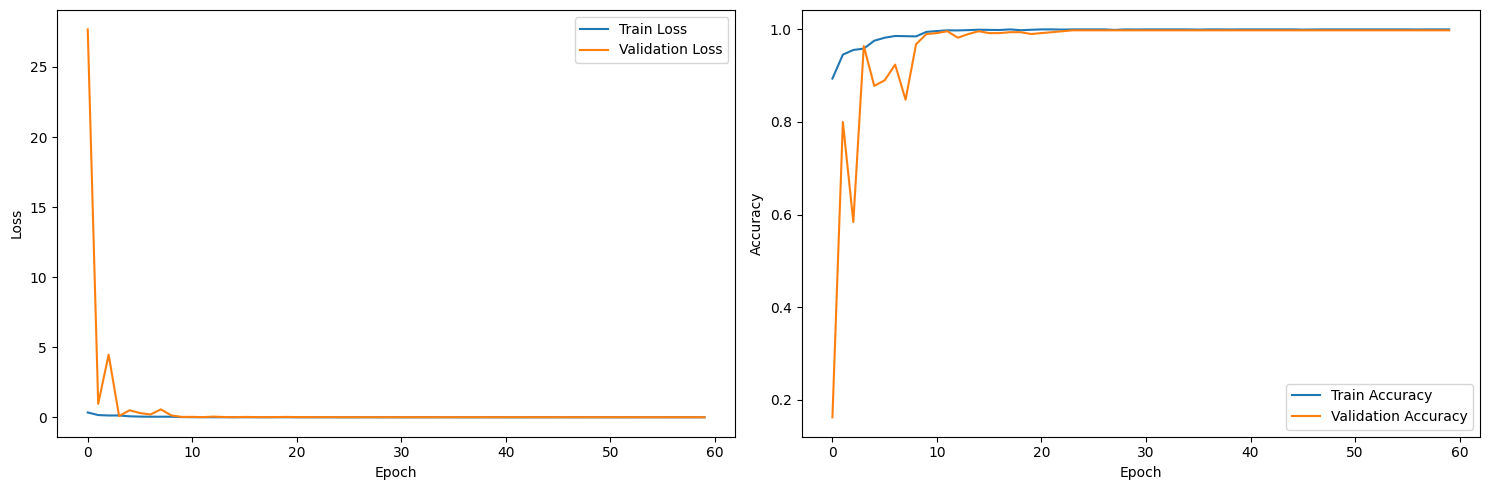

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(15,5))

axes[0].plot(History_4.history['loss'],label='Train Loss')
axes[0].plot(History_4.history['val_loss'],label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

axes[1].plot(History_4.history['accuracy'],label='Train Accuracy')
axes[1].plot(History_4.history['val_accuracy'],label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.tight_layout()

In [ ]:
model_4.evaluate(x_test,y_test)

272/272 ━━━━━━━━━━━━━━━━━━━━ 17s 61ms/step - accuracy: 0.9955 - loss: 0.0135


[0.012348556891083717, 0.9964367747306824]

#Model_5 Se block_ 99.52 ac

In [ ]:
@tf.keras.utils.register_keras_serializable()
class Recalibration_block(tf.keras.layers.Layer):
  def __init__(self,filters,activation='relu',**kwargs):
    super().__init__(**kwargs)
    self.filters=filters
    self.activation=activation

    self.block=[tf.keras.layers.GlobalAveragePooling2D(),
                tf.keras.layers.Dense(units=filters//16,activation=activation),
                tf.keras.layers.Dense(units=filters,activation='sigmoid'),
                tf.keras.layers.Reshape((1,1,filters))]

  def call(self,inputs):
    x=inputs
    for layer in self.block:
      x=layer(x)
    out=tf.multiply(inputs,x)
    return out

  def get_config(self):
    config = super().get_config()
    config.update({
        "filters": self.filters,
        "activation": self.activation
    })
    return config


In [ ]:
Inputs=tf.keras.layers.Input(shape=(32,32,3))
layer_1=tf.keras.layers.BatchNormalization()(Inputs)
layer_2=tf.keras.layers.Conv2D(filters=32,kernel_size=2,padding='same',activation='relu')(layer_1)
layer_3=Inception_mode(filters=32)(layer_2)
layer_4=tf.keras.layers.Conv2D(filters=64,kernel_size=2,padding='same',activation='relu')(layer_3)
layer_5=Inception_mode(filters=64)(layer_4)
recal_0=Recalibration_block(filters=layer_5.shape[-1])(layer_5)

layer_6=tf.keras.layers.Conv2D(filters=128,kernel_size=2,padding='same',activation='relu')(recal_0)

layer_7=Inception_mode(filters=128)(layer_6)
layer_8=tf.keras.layers.Conv2D(filters=128,kernel_size=2,padding='same',activation='relu')(layer_7)
layer_9=Inception_mode(filters=128)(layer_8)
recal_1=Recalibration_block(filters=layer_9.shape[-1])(layer_9)


avg_layer=tf.keras.layers.GlobalAvgPool2D()(recal_1)


outputs=tf.keras.layers.Dense(29,activation='softmax')(avg_layer)

model_5=tf.keras.Model(inputs=Inputs,outputs=outputs)

model_5.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 3)      │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_mode (Inception_mode) │ (None, 32, 32, 96)     │        39,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 64)     │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_mode_1                │ (None, 32, 32, 192)    │       156,800 │
│ (Inception_mode)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ recalibration_block             │ (None, 32, 32, 192)    │         4,812 │
│ (Recalibration_block)           │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 32, 32, 128)    │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_mode_2                │ (None, 32, 32, 384)    │       624,896 │
│ (Inception_mode)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 32, 32, 128)    │       196,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_mode_3                │ (None, 32, 32, 384)    │       624,896 │
│ (Inception_mode)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ recalibration_block_1           │ (None, 32, 32, 384)    │        18,840 │
│ (Recalibration_block)           │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 384)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 29)             │        11,165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,801,133 (6.87 MB)

 Trainable params: 1,799,015 (6.86 MB)

 Non-trainable params: 2,118 (8.27 KB)

In [ ]:
def lr_schedule_exp(epoch,lr):
  if epoch<40:
    return float(tf.exp(-epoch/10.)*0.01)/2
  else:
    return (1e-4)/5
schedule_5=tf.keras.callbacks.LearningRateScheduler(lr_schedule_exp)
check_point_5=tf.keras.callbacks.ModelCheckpoint('model_5.keras',monitor='val_accuracy',verbose=1,save_best_only=True)

In [ ]:
model_5.compile(optimizer=tf.keras.optimizers.SGD(momentum=0.9,nesterov=True),loss='categorical_crossentropy',metrics=['accuracy'])
History_5=model_5.fit(x_train_n,y_train_n,epochs=50,validation_data=(x_val,y_val),callbacks=[schedule_5,check_point_5],batch_size=32)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.1562 - loss: 2.9803
Epoch 1: val_accuracy improved from -inf to 0.02600, saving model to model_5.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 44s 178ms/step - accuracy: 0.1569 - loss: 2.9774 - val_accuracy: 0.0260 - val_loss: 3.6937 - learning_rate: 0.0050
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.4992 - loss: 1.6283
Epoch 2: val_accuracy improved from 0.02600 to 0.03200, saving model to model_5.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.4997 - loss: 1.6269 - val_accuracy: 0.0320 - val_loss: 5.0693 - learning_rate: 0.0045
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7178 - loss: 0.9604
Epoch 3: val_accuracy improved from 0.03200 to 0.62400, saving model to model_5.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.7180 - loss: 0.9597 - val_accuracy: 0.6240 - val_loss: 1.1249 - learning_rate: 0.0041
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step 

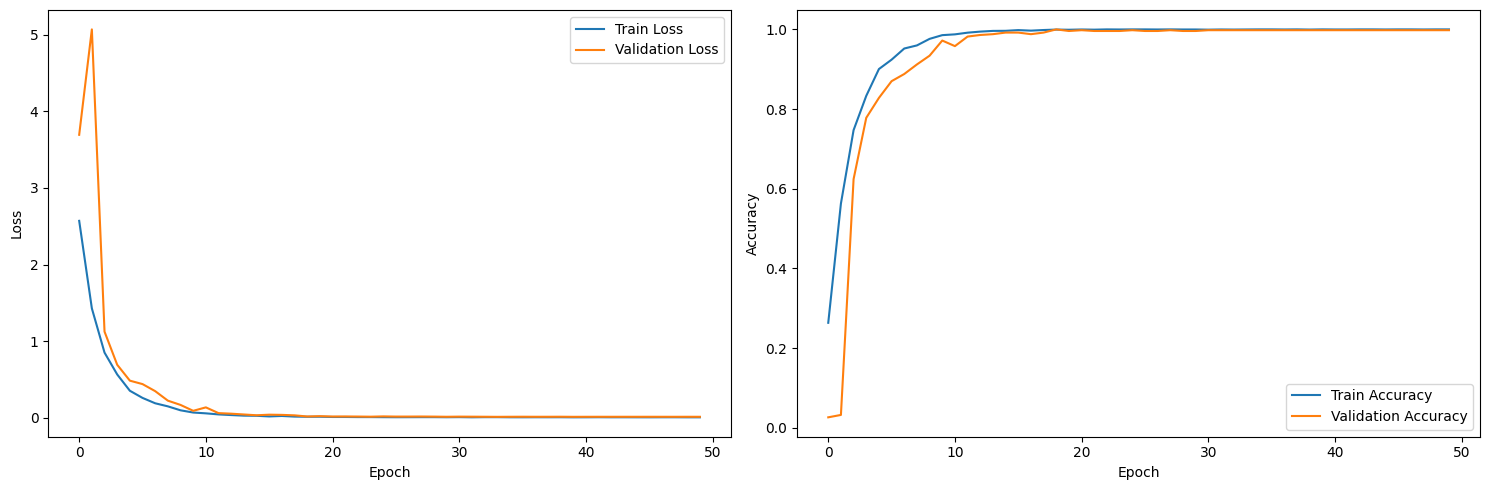

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(15,5))

axes[0].plot(History_5.history['loss'],label='Train Loss')
axes[0].plot(History_5.history['val_loss'],label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

axes[1].plot(History_5.history['accuracy'],label='Train Accuracy')
axes[1].plot(History_5.history['val_accuracy'],label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.tight_layout()

In [ ]:
model_5.evaluate(x_test,y_test)

272/272 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9958 - loss: 0.0175


[0.018701624125242233, 0.9952873587608337]

#Model_6_Res_Block_99.64 ac

In [ ]:

from functools import partial
Conv2d=partial(tf.keras.layers.Conv2D,kernel_size=3,padding='same',strides=1 )

@tf.keras.utils.register_keras_serializable()
class Res_Block(tf.keras.layers.Layer):
  def __init__ (self,filters,strides=1,activation='relu',**kwargs):
    super().__init__(**kwargs)
    self.filters=filters
    self.strides=strides
    self.activation=activation
    self.layer_list=[Conv2d(filters=filters,activation=activation),
                    tf.keras.layers.BatchNormalization(),
                    Conv2d(filters=filters,activation=activation),
                    tf.keras.layers.BatchNormalization()]

    self.conv_shortcut = tf.keras.layers.Conv2D(filters=self.filters,
                                                kernel_size=1, padding='same',
                                                strides=1)


  def call(self, inputs):

      def apply_layers(x, layer_list):
          for layer in layer_list:
              x = layer(x)
          return x

      x = apply_layers(inputs, self.layer_list)
      conv_out= self.conv_shortcut(inputs)
      return tf.keras.layers.add([conv_out, x])

  def get_config(self):
    config = super().get_config()
    config.update({
        "filters": self.filters,
        "strides": self.strides,
        "activation": self.activation
    })
    return config


In [ ]:
inputs=tf.keras.layers.Input(shape=(32,32,3))
layer_0=tf.keras.layers.BatchNormalization()(inputs)
layer_2=tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu')(layer_0)
layer_3=Inception_mode(filters=32)(layer_2)
res_block_1=Res_Block(filters=32)(layer_3)
layer_4=tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu')(res_block_1)
layer_5=Inception_mode(filters=64)(layer_4)

concatlayer_1=tf.keras.layers.Concatenate(axis=-1)([layer_4,layer_5])

layer_6=tf.keras.layers.SeparableConv2D(filters=224,kernel_size=2,padding='same',activation='relu')(concatlayer_1)
layer_7=Inception_mode(filters=128)(layer_6)
res_block_2=Res_Block(filters=128)(layer_7)
layer_8=tf.keras.layers.SeparableConv2D(filters=256,kernel_size=2,padding='same',activation='relu')(res_block_2)
layer_9=Inception_mode(filters=256)(layer_8)

concatlayer_2=tf.keras.layers.Concatenate(axis=-1)([layer_8,layer_9])

layer_10=tf.keras.layers.GlobalAveragePooling2D()(concatlayer_2)
outputs=tf.keras.layers.Dense(29,activation='softmax')(layer_10)

model_6=tf.keras.Model(inputs=inputs,outputs=outputs)








model_6.summary()





Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32, 3) │         12 │ input_layer_4[0]… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, 32, 32,    │        896 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ inception_mode_12   │ (None, 32, 32,    │     39,488 │ conv2d_95[0][0]   │
│ (Inception_mode)    │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res__block_2        │ (None, 32, 32,    │     40,288 │ inception_mode_1… │
│ (Res_Block)         │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_105 (Conv2D) │ (None, 32, 32,    │     18,496 │ res__block_2[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ inception_mode_13   │ (None, 32, 32,    │    156,800 │ conv2d_105[0][0]  │
│ (Inception_mode)    │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_20      │ (None, 32, 32,    │          0 │ conv2d_105[0][0], │
│ (Concatenate)       │ 256)              │            │ inception_mode_1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_2  │ (None, 32, 32,    │     58,592 │ concatenate_20[0… │
│ (SeparableConv2D)   │ 224)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ inception_mode_14   │ (None, 32, 32,    │    858,368 │ separable_conv2d… │
│ (Inception_mode)    │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res__block_3        │ (None, 32, 32,    │    640,384 │ inception_mode_1… │
│ (Res_Block)         │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_3  │ (None, 32, 32,    │     33,536 │ res__block_3[0][… │
│ (SeparableConv2D)   │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ inception_mode_15   │ (None, 32, 32,    │  2,494,976 │ separable_conv2d… │
│ (Inception_mode)    │ 768)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_23      │ (None, 32, 32,    │          0 │ separable_conv2d… │
│ (Concatenate)       │ 1024)             │            │ inception_mode_1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 1024)      │          0 │ concatenate_23[0… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 29)        │     29,725 │ global_average_p… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,371,561 (16.68 MB)

 Trainable params: 4,368,035 (16.66 MB)

 Non-trainable params: 3,526 (13.77 KB)

In [ ]:
def lr_schedule_exp(epoch):
  if epoch<50:
    return float(tf.exp(-epoch/10.)*0.01)
  else:
    return (1e-4)/7


schedule_6=tf.keras.callbacks.LearningRateScheduler(lr_schedule_exp)
check_point_6=tf.keras.callbacks.ModelCheckpoint('model_6.keras',monitor='val_accuracy',verbose=1,save_best_only=True)
model_6.compile(optimizer=tf.keras.optimizers.SGD(momentum=0.9,nesterov=True),loss='categorical_crossentropy',metrics=['accuracy'])
History_6=model_6.fit(x_train_n,y_train_n,epochs=60,validation_data=(x_val,y_val),callbacks=[schedule_6,check_point_6],batch_size=32)

Epoch 1/60
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.2377 - loss: 2.6303
Epoch 1: val_accuracy improved from -inf to 0.08000, saving model to model_6.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 54s 244ms/step - accuracy: 0.2387 - loss: 2.6261 - val_accuracy: 0.0800 - val_loss: 3.4053 - learning_rate: 0.0100
Epoch 2/60
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.6980 - loss: 0.9430
Epoch 2: val_accuracy improved from 0.08000 to 0.39200, saving model to model_6.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 57s 141ms/step - accuracy: 0.6983 - loss: 0.9422 - val_accuracy: 0.3920 - val_loss: 2.1286 - learning_rate: 0.0090
Epoch 3/60
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.8510 - loss: 0.4713
Epoch 3: val_accuracy improved from 0.39200 to 0.78400, saving model to model_6.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 21s 146ms/step - accuracy: 0.8511 - loss: 0.4709 - val_accuracy: 0.7840 - val_loss: 0.7322 - learning_rate: 0.0082
Epoch 4/60
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/

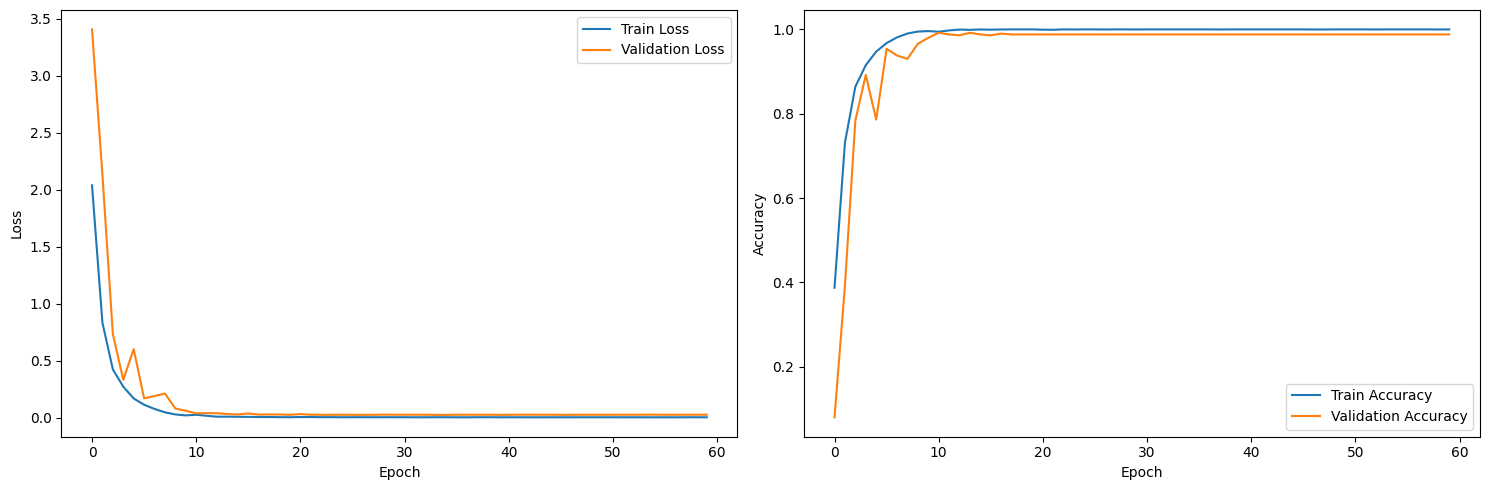

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(15,5))

axes[0].plot(History_6.history['loss'],label='Train Loss')
axes[0].plot(History_6.history['val_loss'],label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

axes[1].plot(History_6.history['accuracy'],label='Train Accuracy')
axes[1].plot(History_6.history['val_accuracy'],label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.tight_layout()

In [ ]:
model_6.evaluate(x_test,y_test)

272/272 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - accuracy: 0.9958 - loss: 0.0118


[0.011670517735183239, 0.9964367747306824]

In [ ]:
model_6.save('ASL_Model_9958.keras')

#Model_7_99.89 ac (My Best Model)

In [ ]:

from functools import partial
Conv2d=partial(tf.keras.layers.Conv2D,kernel_size=3,padding='same',strides=1 )

@tf.keras.utils.register_keras_serializable()
class Inception_mode(tf.keras.layers.Layer):
  def __init__ (self,filters,strides=1,activation='relu',**kwargs):
    super().__init__(**kwargs)
    self.filters=filters
    self.strides=strides
    self.activation=activation
    self.concat = tf.keras.layers.Concatenate(axis=-1)

    self.inception_layers_1=[tf.keras.layers.MaxPooling2D(pool_size=2,strides=strides,padding='same'),
                             Conv2d(filters=filters,activation=activation),
                             tf.keras.layers.BatchNormalization(),
                             Conv2d(filters=filters)]

    self.inception_layers_2=[tf.keras.layers.AveragePooling2D(pool_size=2,strides=strides,padding='same'),
                             Conv2d(filters=filters),
                             tf.keras.layers.BatchNormalization(),
                             Conv2d(filters=filters)]

    self.inception_layers_3=[Conv2d(filters=filters,strides=strides,activation=activation,kernel_size=1),
                             tf.keras.layers.BatchNormalization(),
                             Conv2d(filters=filters,kernel_size=1)]



  def build(self, input_shape):
      input_shape = list(input_shape)
      input_shape[0] = 1
      input_shape = tuple(input_shape)

      dummy = tf.keras.backend.zeros(input_shape)
      _ = self.call(dummy)
      super().build(input_shape)


  def call(self, inputs):
      def apply_layers(x, layer_list):
          for layer in layer_list:
              x = layer(x)
          return x

      x1 = apply_layers(inputs, self.inception_layers_1)
      x2 = apply_layers(inputs, self.inception_layers_2)
      x3 = apply_layers(inputs, self.inception_layers_3)

      return self.concat([x1, x2, x3])

  def get_config(self):
    config = super().get_config()
    config.update({
        "filters": self.filters,
        "strides": self.strides,
        "activation": self.activation
    })
    return config



In [ ]:
inputs=tf.keras.layers.Input(shape=(32,32,3))
layer_1=tf.keras.layers.BatchNormalization()(inputs)
layer_2=tf.keras.layers.Conv2D(filters=32,kernel_size=2,padding='same',activation='relu')(layer_1)
layer_3=Inception_mode(filters=32)(layer_2)
layer_4=tf.keras.layers.Conv2D(filters=64,kernel_size=2,padding='same',activation='relu')(layer_3)
layer_5=Inception_mode(filters=64)(layer_4)
concatlayer_1=tf.keras.layers.Concatenate(axis=-1)([layer_2,layer_5])
normal=tf.keras.layers.BatchNormalization()(concatlayer_1)
layer_6=tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu')(normal)
layer_7=Inception_mode(filters=128)(layer_6)
layer_8=tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu')(layer_7)
layer_9=Inception_mode(filters=256)(layer_8)
concatlayer_2=tf.keras.layers.Concatenate(axis=-1)([layer_6,layer_9])
layer_10=tf.keras.layers.GlobalAveragePooling2D()(concatlayer_2)
outputs=tf.keras.layers.Dense(29,activation='softmax')(layer_10)

model_7=tf.keras.Model(inputs=inputs,outputs=outputs)








model_7.summary()
model_7.compile(optimizer=tf.keras.optimizers.SGD(momentum=0.9,nesterov=True),loss='categorical_crossentropy',metrics=['accuracy'])

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32, 3) │         12 │ input_layer_1[0]… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 32, 32,    │        416 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ inception_mode_4    │ (None, 32, 32,    │     39,488 │ conv2d_28[0][0]   │
│ (Inception_mode)    │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_35 (Conv2D)  │ (None, 32, 32,    │     24,640 │ inception_mode_4… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ inception_mode_5    │ (None, 32, 32,    │    156,800 │ conv2d_35[0][0]   │
│ (Inception_mode)    │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_8       │ (None, 32, 32,    │          0 │ conv2d_28[0][0],  │
│ (Concatenate)       │ 224)              │            │ inception_mode_5… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        896 │ concatenate_8[0]… │
│ (BatchNormalizatio… │ 224)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_42 (Conv2D)  │ (None, 32, 32,    │    258,176 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ inception_mode_6    │ (None, 32, 32,    │    624,896 │ conv2d_42[0][0]   │
│ (Inception_mode)    │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_49 (Conv2D)  │ (None, 32, 32,    │    884,992 │ inception_mode_6… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ inception_mode_7    │ (None, 32, 32,    │  2,494,976 │ conv2d_49[0][0]   │
│ (Inception_mode)    │ 768)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_11      │ (None, 32, 32,    │          0 │ conv2d_42[0][0],  │
│ (Concatenate)       │ 896)              │            │ inception_mode_7… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 896)       │          0 │ concatenate_11[0… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 29)        │     26,013 │ global_average_p… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,511,305 (17.21 MB)

 Trainable params: 4,507,971 (17.20 MB)

 Non-trainable params: 3,334 (13.02 KB)

In [ ]:

def lr_schedule_exp(epoch):
  if epoch<50:
    return float(tf.exp(-epoch/10.)*0.01)/2
  else:
    return 0.0001/5
schedule_2=tf.keras.callbacks.LearningRateScheduler(lr_schedule_exp)
check_point_2=tf.keras.callbacks.ModelCheckpoint('model_7.keras',monitor='val_accuracy',verbose=1,save_best_only=True)

In [ ]:
history_7=model_7.fit(x_train_n,y_train_n,epochs=60,validation_data=(x_val,y_val),callbacks=[schedule_2,check_point_2],batch_size=32)

Epoch 1/60
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.2408 - loss: 2.6460
Epoch 1: val_accuracy improved from -inf to 0.04000, saving model to model_7.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 44s 214ms/step - accuracy: 0.2419 - loss: 2.6418 - val_accuracy: 0.0400 - val_loss: 5.4392 - learning_rate: 0.0050
Epoch 2/60
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.7277 - loss: 0.8995
Epoch 2: val_accuracy improved from 0.04000 to 0.20400, saving model to model_7.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 20s 142ms/step - accuracy: 0.7280 - loss: 0.8986 - val_accuracy: 0.2040 - val_loss: 2.9384 - learning_rate: 0.0045
Epoch 3/60
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.8468 - loss: 0.5072
Epoch 3: val_accuracy improved from 0.20400 to 0.77400, saving model to model_7.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 20s 142ms/step - accuracy: 0.8469 - loss: 0.5068 - val_accuracy: 0.7740 - val_loss: 0.7129 - learning_rate: 0.0041
Epoch 4/60
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/

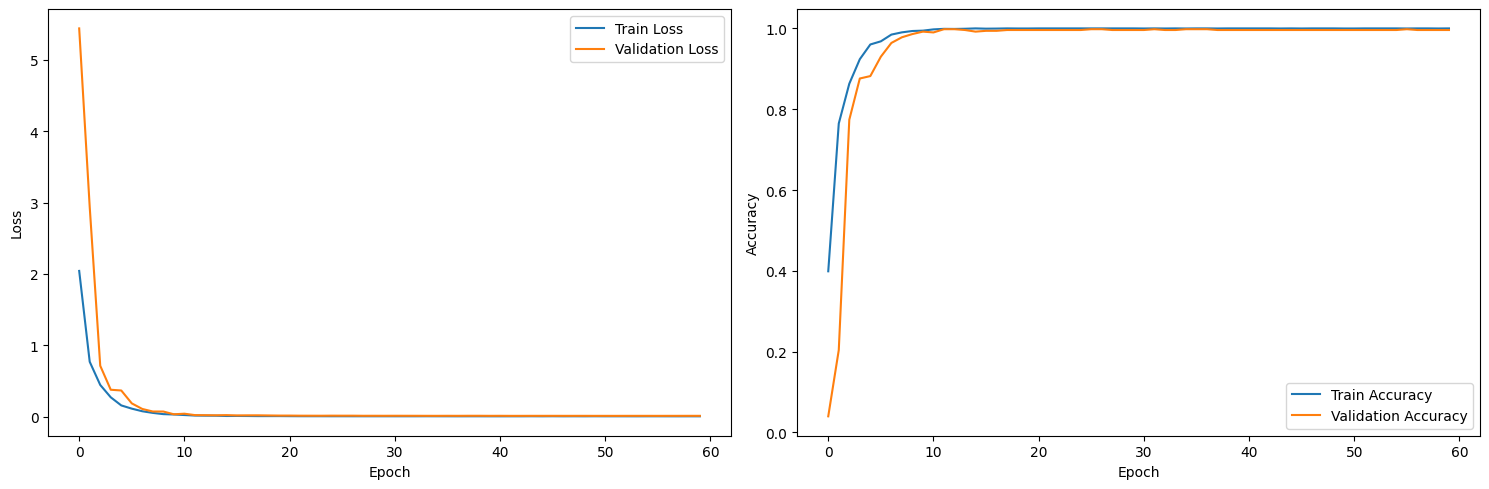

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(15,5))

axes[0].plot(history_7.history['loss'],label='Train Loss')
axes[0].plot(history_7.history['val_loss'],label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

axes[1].plot(history_7.history['accuracy'],label='Train Accuracy')
axes[1].plot(history_7.history['val_accuracy'],label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.tight_layout()

In [ ]:
model_7.evaluate(x_test,y_test)

272/272 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - accuracy: 0.9989 - loss: 0.0086


[0.009578918106853962, 0.998275876045227]

In [ ]:
model_7.save('ASL_Model_9989.keras')

In [ ]:
loaded_model=tf.keras.models.load_model('/content/ASL_Model_9989.keras')

In [ ]:
loaded_model.evaluate(x_test,y_test)

272/272 ━━━━━━━━━━━━━━━━━━━━ 23s 62ms/step - accuracy: 0.9989 - loss: 0.0086


[0.009578918106853962, 0.998275876045227]

In [ ]:
predictions=tf.argmax(loaded_model.predict(x_test),axis=-1)
y_true=tf.argmax(y_test,axis=-1)
from sklearn.metrics import classification_report
print(classification_report(y_true,predictions))

272/272 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       290
           1       0.99      0.98      0.99       304
           2       1.00      1.00      1.00       296
           3       1.00      1.00      1.00       281
           4       1.00      1.00      1.00       301
           5       1.00      1.00      1.00       296
           6       1.00      1.00      1.00       320
           7       1.00      1.00      1.00       297
           8       1.00      1.00      1.00       303
           9       0.98      0.99      0.98       317
          10       1.00      1.00      1.00       296
          11       1.00      1.00      1.00       314
          12       1.00      1.00      1.00       294
          13       1.00      1.00      1.00       316
          14       1.00      1.00      1.00       274
          15       1.00      1.00      1.00       291
          16       1.00      1.00     